In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np # linear algebra

In [2]:
import glob
import os
import cv2
import numpy as np
# Load the dataset
data_dir = '/Users/vaibhav/Downloads/archive (1)/Train/Train'
data_test = '/Users/vaibhav/Downloads/archive (1)/Test/Test'
class_names = os.listdir(data_dir) # train folder
class_names1 = os.listdir(data_test) # test folder
num_classes = len(class_names)
num_classes1 = len(class_names1)
X_train = []
X_test = []
y_train = []
y_test = []
label_map = {"Healthy": "Healthy", "Powdery": "Powdery", "Rust": "Rust"}
label_map1 = {"Healthy": "Healthy", "Powdery": "Powdery", "Rust": "Rust"}

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for img_path in glob.glob(os.path.join(class_dir, '*.jpg')):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        X_train.append(img.flatten())
        y_train.append(label_map[class_name])

for class_name1 in class_names1:
    class_dir1 = os.path.join(data_test, class_name1)
    for img_path in glob.glob(os.path.join(class_dir1, '*.jpg')):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            X_test.append(img.flatten())
            y_test.append(label_map1[class_name1])


In [3]:
# Reshape the data
X_train = np.array(X_train).reshape(len(X_train), -1)
 

# Reshape the data
X_test = np.array(X_test).reshape(len(X_test), -1)
X_train

array([[ 68, 133,  88, ..., 137, 224, 196],
       [188, 210, 203, ..., 194, 232, 233],
       [ 94, 141, 108, ..., 122, 173, 133],
       ...,
       [135, 211, 180, ..., 110, 138, 108],
       [ 97, 113, 105, ...,  52,  65,  49],
       [159, 161, 161, ..., 196, 230, 220]], dtype=uint8)

Train Set:
Healthy    458
Rust       434
Powdery    430
dtype: int64

Test Set:
Powdery    50
Healthy    50
Rust       50
dtype: int64


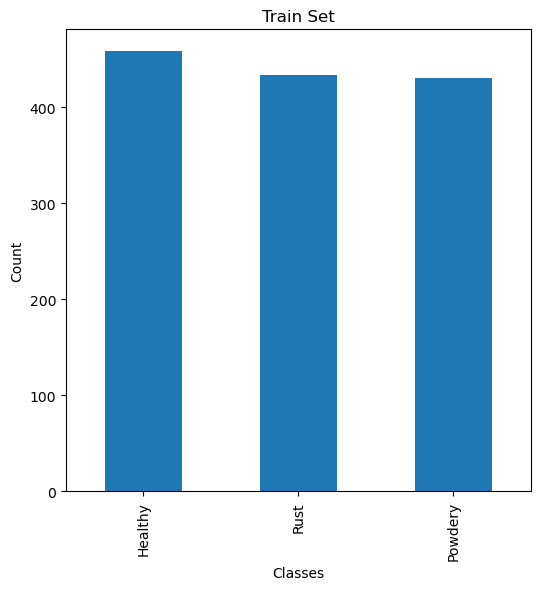

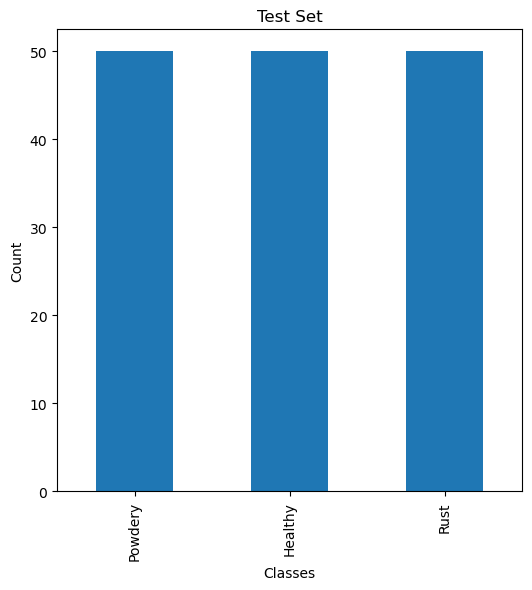

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the count of images for each class in the train set
train_counts = pd.Series(y_train).value_counts()

# Get the count of images for each class in the test set
test_counts = pd.Series(y_test).value_counts()

# Print the count of images for each class in the train set
print('Train Set:')
print(train_counts)

# Print the count of images for each class in the test set
print('\nTest Set:')
print(test_counts)

# Draw a bar chart showing the count of images for each class in the train set
plt.figure(figsize=(6, 6))
train_counts.plot(kind='bar')
plt.title('Train Set')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Draw a bar chart showing the count of images for each class in the test set
plt.figure(figsize=(6, 6))
test_counts.plot(kind='bar')
plt.title('Test Set')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


In [5]:
# Train the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.54


Confusion Matrix:
[[47  0  3]
 [23 27  0]
 [40  3  7]]


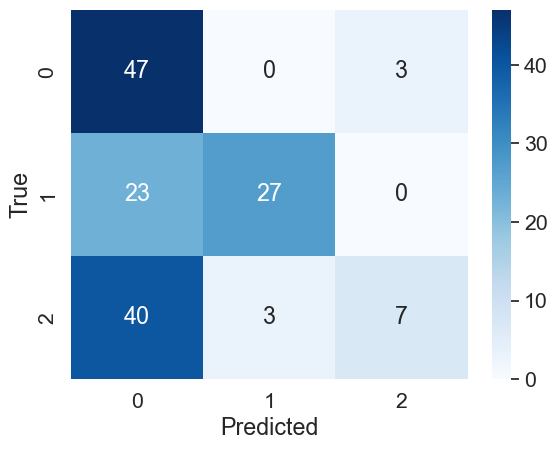

In [6]:
#confusion matrix and performance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix as an image
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

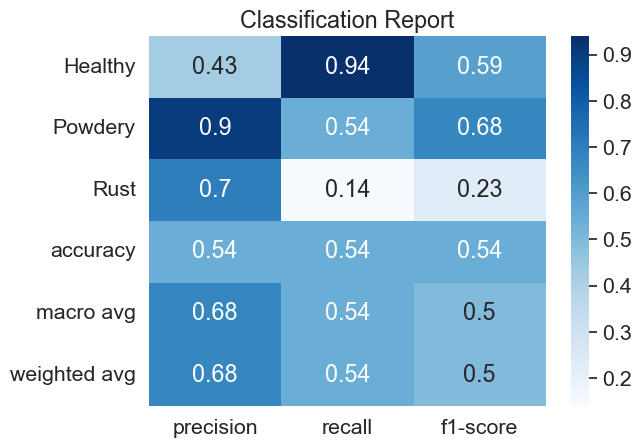

In [7]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
report = classification_report(y_test, y_pred, output_dict=True)

# Create a heatmap
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [8]:
#Train the svm model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

Confusion Matrix:
[[46  2  2]
 [10 40  0]
 [26  3 21]]


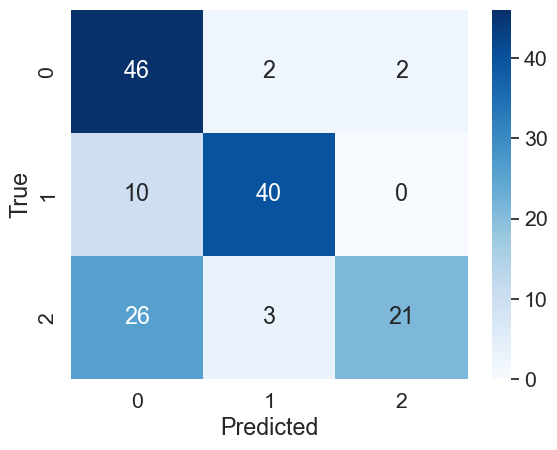

In [9]:
#confusion matrix for svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix as an image
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

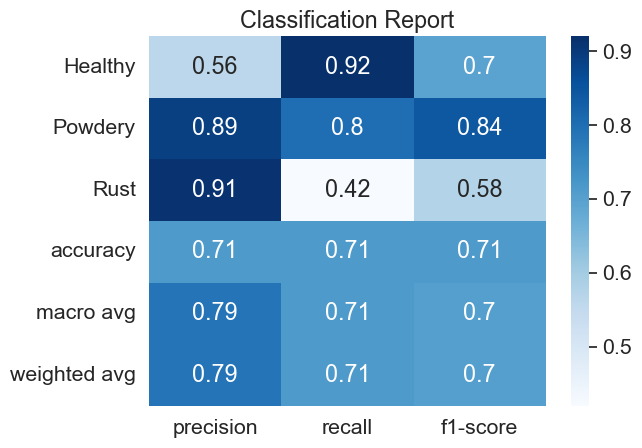

In [10]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Create a heatmap
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [11]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=56)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

Confusion Matrix:
[[36  5  9]
 [14 36  0]
 [29  3 18]]


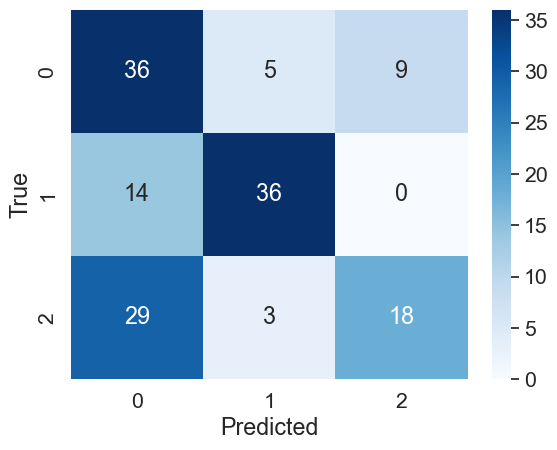

In [12]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix as an image
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

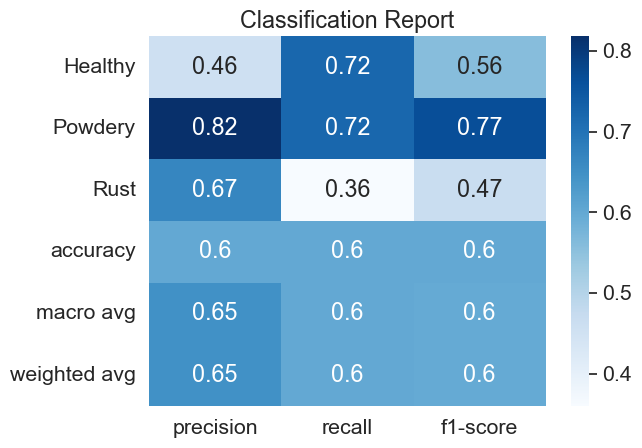

In [13]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Create a heatmap
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [14]:
print("Accuracy SVM:", accuracy_svm)
print("Accuracy rf:", accuracy_rf)
print("Accuracy knn:",accuracy)

Accuracy SVM: 0.7133333333333334
Accuracy rf: 0.6
Accuracy knn: 0.54


In [15]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset

# Save the trained model to a file
joblib.dump(svm, 'model.joblib')


['model.joblib']